# Multiclass Classification - LR

- Iris Dataset

## Step 1: Import necessary libraries

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize


## Step 2: Load the dataset

In [104]:
data = pd.read_csv("titanic-2.csv")

## Step 3: Exploratory Data Analysis (EDA)

In [105]:
# Display the first few rows of the dataset
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [137]:
data["Pclass"].value_counts()

Pclass
3    491
1    214
2    184
Name: count, dtype: int64

## Handle missing and duplicate data

In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [107]:
len(data)

891

In [108]:
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [109]:
# drop cabin column as it has mostly null values
data.drop('Cabin', axis=1, inplace=True)

In [110]:
# fill 177 values of age using mean imputation
data['Age'] = data['Age'].fillna(data['Age'].mean())


In [111]:
# drop rows where "Embarked" label is missing
data.dropna(subset=['Embarked'], inplace=True)


In [112]:
# drop PassengerId
data.drop('PassengerId', axis=1, inplace=True)

## Handle non numeric columns

In [113]:
# drop Name column
data.drop('Name', axis=1, inplace=True)

In [114]:
# drop Ticket column
data.drop('Ticket', axis=1, inplace=True)

In [115]:
# convert "sex" column to 0 and 1
data["Sex"] = pd.factorize(data["Sex"])[0]

In [116]:
data["Embarked"] = pd.factorize(data["Embarked"])[0]

In [117]:
# Summary statistics of the features
data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,0.350956,29.653446,0.524184,0.382452,32.096681,0.362205
std,0.486260,0.834700,0.477538,12.968366,1.103705,0.806761,49.697504,0.636157
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,0.000000
50%,0.000000,3.000000,0.000000,29.699118,0.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [118]:
# Count of each class
data.value_counts()

Survived  Pclass  Sex  Age        SibSp  Parch  Fare     Embarked
0         3       0    29.699118  0      0      7.8958   0           13
                                                8.0500   0           12
                                                7.7500   2            9
1         3       1    29.699118  0      0      7.7500   2            7
0         2       0    29.699118  0      0      0.0000   0            6
                                                                     ..
          3       0    28.000000  1      0      15.8500  0            1
                                  2      0      7.9250   0            1
                       28.500000  0      0      7.2292   1            1
                                                16.1000  0            1
1         3       1    63.000000  0      0      9.5875   0            1
Name: count, Length: 778, dtype: int64

In [119]:
data["Survived"].value_counts()

Survived
0    549
1    340
Name: count, dtype: int64

C:\Users\hp\anaconda3\envs\dl\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


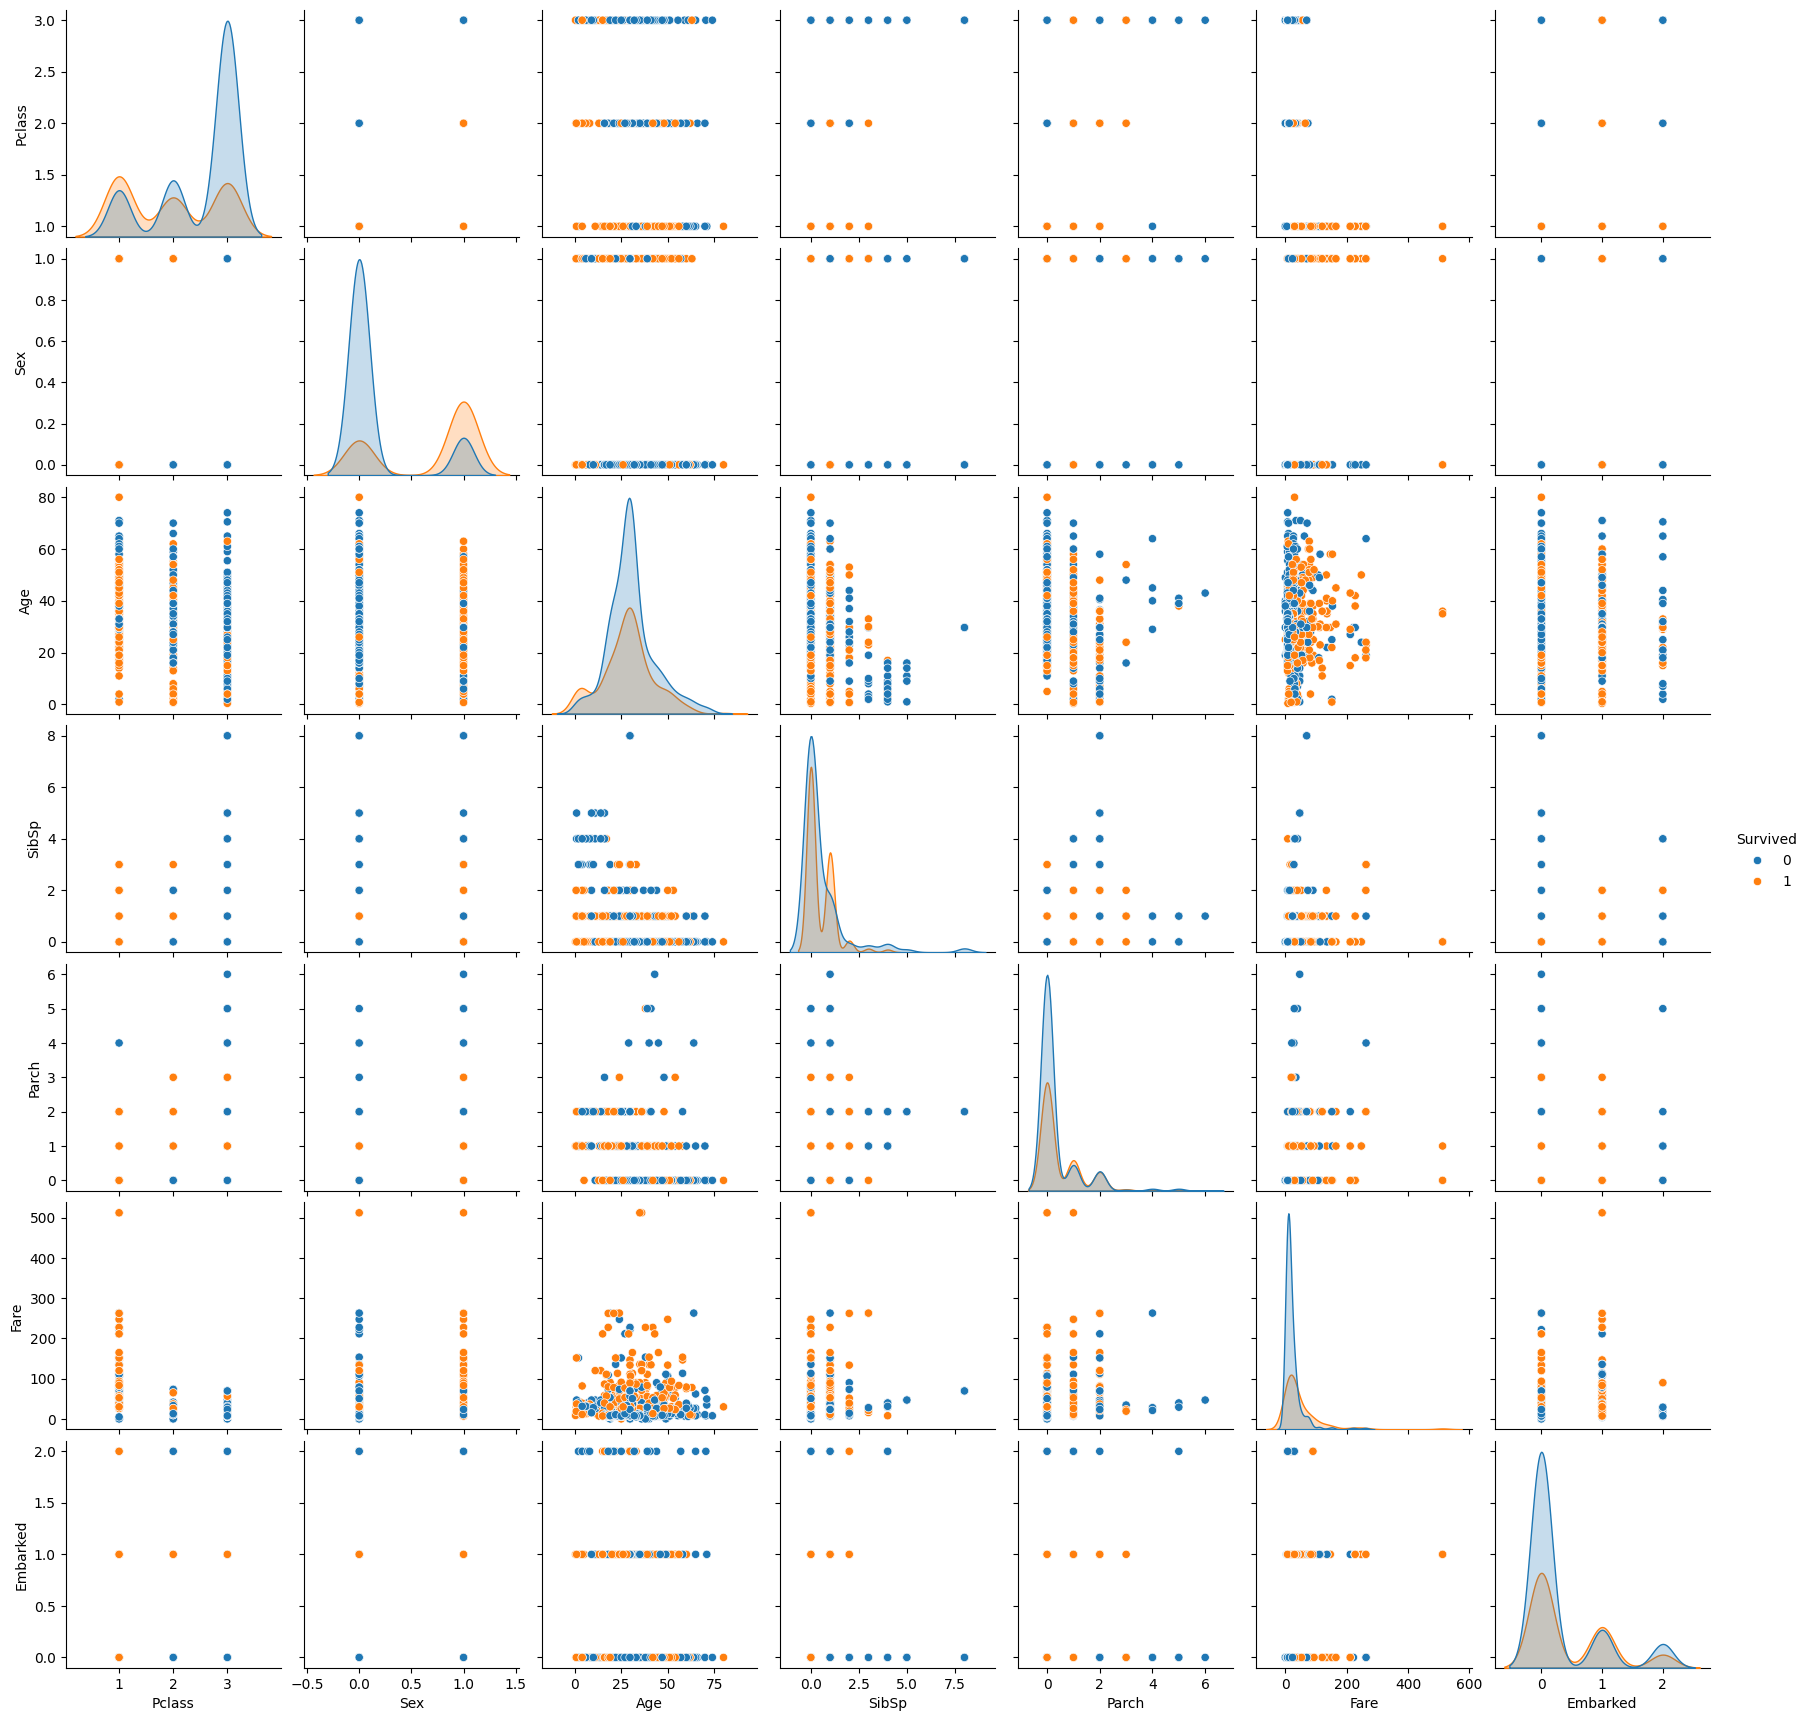

In [120]:
# Visualizations
# Pairplot to visualize relationships between features
sns.pairplot(data, hue="Survived")
plt.show()

## Step 4: Data Preprocessing

In [121]:
# Split the dataset into features (X) and target labels (y)
X = data.drop("Survived", axis=1)
y = data["Survived"]

In [122]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [123]:
y_train.value_counts(), y_test.value_counts()

(Survived
 0    440
 1    271
 Name: count, dtype: int64,
 Survived
 0    109
 1     69
 Name: count, dtype: int64)

In [124]:
# Standardize the features (important for logistic regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Step 5: Model Training

In [125]:
# Create and train a logistic regression model
model = LogisticRegression(max_iter=1000,verbose=1)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, verbose=1)

## Step 6: Model Evaluation


In [126]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [127]:
# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       109
           1       0.69      0.77      0.73        69

    accuracy                           0.78       178
   macro avg       0.76      0.77      0.77       178
weighted avg       0.78      0.78      0.78       178



In [128]:
# Create a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

Confusion Matrix:
[[85 24]
 [16 53]]


## Step 7: Visualization 

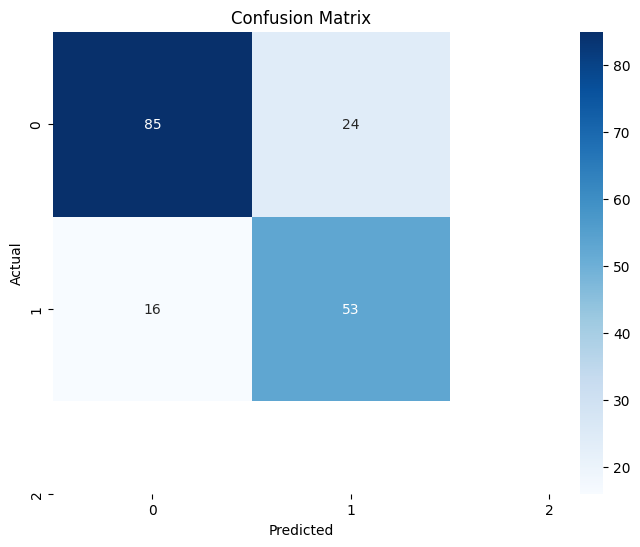

In [129]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='d', xticklabels=data["Embarked"].unique(),
            yticklabels=data["Embarked"].unique())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [135]:
# Classification Report
classification_rep = classification_report(y_test, y_pred)
print('Classification Report:')
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       109
           1       0.69      0.77      0.73        69

    accuracy                           0.78       178
   macro avg       0.76      0.77      0.77       178
weighted avg       0.78      0.78      0.78       178



# Step 8: ROC and AUC Visualization

In [133]:
# ROC Curve and AUC
y_pred_prob = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

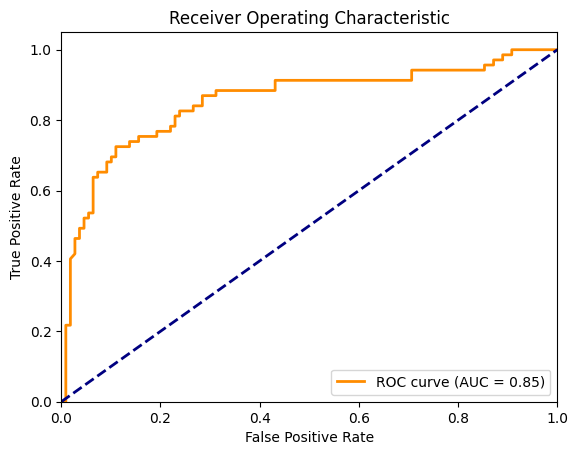

In [134]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()